# Shinkansen Travel Experience

## Goal
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.


## Context

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’.


## Objective

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.



## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Tentative Data Dictionary**
* ID:
* Gender:
* Customer_Type:
* Type_Travel:
* Travel_Distance:
* Departure_Delay_in_Mins:
* Arrival_Delay_in_Mins:

## Importing necessary libraries and data

In [8]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import copy

from scipy.stats import chisquare

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [9]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# To tune model, get different metric scores, and split data
# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# label encoder
from sklearn import preprocessing


# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Importing the XGBClassifier from the xgboost library
#from xgboost import XGBClassifier
#import xgboost as xgb

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
Traveldata_train = pd.read_csv("/content/drive/MyDrive/Hackathon/Traveldata_train_(2).csv")

In [12]:
Survey_train = pd.read_csv("/content/drive/MyDrive/Hackathon/Surveydata_train_(2).csv")

In [13]:
Traveldata_test = pd.read_csv("/content/drive/MyDrive/Hackathon/Traveldata_test_(2).csv")

In [14]:
Survey_test = pd.read_csv("/content/drive/MyDrive/Hackathon/Surveydata_test_(2).csv")

In [15]:
#t_train = pd.read_csv("Traveldata_train.csv")
#s_train = pd.read_csv("Surveydata_train.csv")
#t_test = pd.read_csv("Traveldata_test.csv")
#s_test = pd.read_csv("Surveydata_test.csv")

In [16]:
# copying data to another variable to avoid any changes to original data
Traveldata_train_copy = Traveldata_train.copy()

In [17]:
Surveydata_train_copy = Survey_train.copy()

In [18]:
Traveldata_test_copy = Traveldata_test.copy()

In [19]:
Surveydata_test_copy = Survey_test.copy()

In [20]:
Traveldata_train_copy.head(5) ##  Complete the code to view top 5 rows of the data

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000
1,98800002,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000
2,98800003,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000
3,98800004,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000
4,98800005,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000


In [21]:
Surveydata_train_copy.head(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [22]:
Traveldata_train_copy.tail(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.00000,Business Travel,Business,1357,83.00000,125.00000
94375,98894376,Male,Loyal Customer,44.00000,Business Travel,Business,592,5.00000,11.00000
94376,98894377,Male,NaN,63.00000,Business Travel,Business,2794,0.00000,0.00000
94377,98894378,Male,Loyal Customer,16.00000,Personal Travel,Eco,2744,0.00000,0.00000
94378,98894379,Male,Loyal Customer,54.00000,NaN,Eco,2107,28.00000,28.00000


In [23]:
Surveydata_train_copy.tail(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


## Data Overview

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**


In [24]:
Traveldata_train_copy.shape

(94379, 9)

In [25]:
Surveydata_train_copy.shape

(94379, 17)

In [26]:
l=[Traveldata_train_copy, Surveydata_train_copy]

In [27]:
for i in l:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID              

In [28]:
for i in l:
    print(i.nunique())

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64
ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64


In [29]:
# Check for missing values
missing_values_travel = Traveldata_train_copy.isna().sum()

missing_values_survey = Surveydata_train_copy.isna().sum()

# Print missing values counts for each column
print("Missing Values:")
print(missing_values_travel)
print(missing_values_survey)

Missing Values:
ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64
ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64


In [30]:
Traveldata_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.00000,98847190.00000,27245.01487,98800001.00000,98823595.50000,98847190.00000,98870784.50000,98894379.00000
Age,94346.00000,39.41965,15.11663,7.00000,27.00000,40.00000,51.00000,85.00000
Travel_Distance,94379.00000,1978.88818,1027.96102,50.00000,1359.00000,1923.00000,2538.00000,6951.00000
Departure_Delay_in_Mins,94322.00000,14.64709,38.13878,0.00000,0.00000,0.00000,12.00000,1592.00000
Arrival_Delay_in_Mins,94022.00000,15.00522,38.43941,0.00000,0.00000,0.00000,13.00000,1584.00000


In [31]:
Surveydata_train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.00000,98847190.00000,27245.01487,98800001.00000,98823595.50000,98847190.00000,98870784.50000,98894379.00000
Overall_Experience,94379.00000,0.54666,0.49782,0.00000,0.00000,1.00000,1.00000,1.00000


In [32]:
# Making a list of all catrgorical variables
cat_col = list(Traveldata_train_copy.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(Traveldata_train_copy[column].value_counts())
    print("-" * 50)

Gender
Female    47815
Male      46487
Name: count, dtype: int64
--------------------------------------------------
Customer_Type
Loyal Customer       69823
Disloyal Customer    15605
Name: count, dtype: int64
--------------------------------------------------
Type_Travel
Business Travel    58617
Personal Travel    26536
Name: count, dtype: int64
--------------------------------------------------
Travel_Class
Eco         49342
Business    45037
Name: count, dtype: int64
--------------------------------------------------


In [33]:
# Making a list of all catrgorical variables
cat_col = list(Surveydata_train_copy.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(Surveydata_train_copy[column].value_counts())
    print("-" * 50)

Seat_Comfort
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: count, dtype: int64
--------------------------------------------------
Seat_Class
Green Car    47435
Ordinary     46944
Name: count, dtype: int64
--------------------------------------------------
Arrival_Time_Convenient
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: count, dtype: int64
--------------------------------------------------
Catering
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: count, dtype: int64
--------------------------------------------------
Platform_Location
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient

In [34]:
# checking the number of unique values
Traveldata_train_copy["ID"].unique() # Complete the code to check the number of unique values

array([98800001, 98800002, 98800003, ..., 98894377, 98894378, 98894379])

In [35]:
# checking the number of unique values
Surveydata_train_copy["ID"].unique() # Complete the code to check the number of unique values

array([98800001, 98800002, 98800003, ..., 98894377, 98894378, 98894379])

In [36]:
train = pd.merge(Traveldata_train_copy, Surveydata_train_copy, on='ID', how='inner')
test = pd.merge(Traveldata_test_copy, Surveydata_test_copy, on='ID', how='inner')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [39]:
train.ID.nunique()

94379

In [40]:
# Selecting numerical columns and checking the summary statistics
num_cols = train.select_dtypes('number').columns

train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.00000,98847190.00000,27245.01487,98800001.00000,98823595.50000,98847190.00000,98870784.50000,98894379.00000
Age,94346.00000,39.41965,15.11663,7.00000,27.00000,40.00000,51.00000,85.00000
Travel_Distance,94379.00000,1978.88818,1027.96102,50.00000,1359.00000,1923.00000,2538.00000,6951.00000
Departure_Delay_in_Mins,94322.00000,14.64709,38.13878,0.00000,0.00000,0.00000,12.00000,1592.00000
Arrival_Delay_in_Mins,94022.00000,15.00522,38.43941,0.00000,0.00000,0.00000,13.00000,1584.00000
Overall_Experience,94379.00000,0.54666,0.49782,0.00000,0.00000,1.00000,1.00000,1.00000


ID
Skew : 0.0


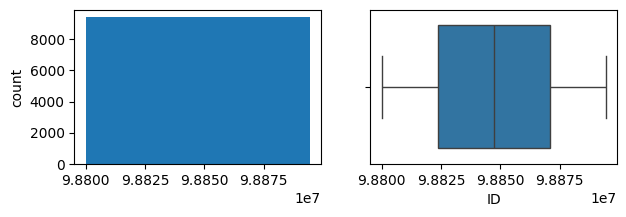

Age
Skew : -0.0


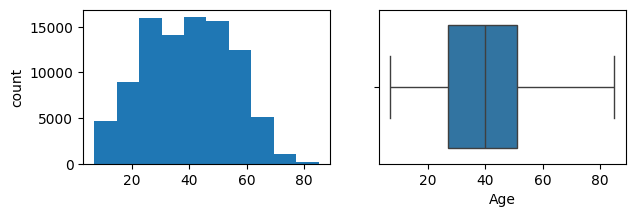

Travel_Distance
Skew : 0.47


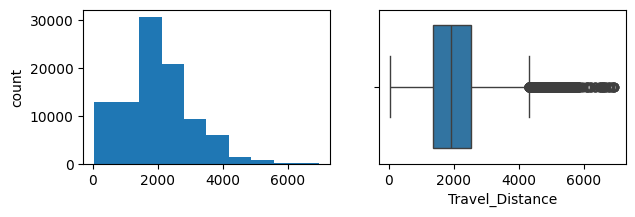

Departure_Delay_in_Mins
Skew : 7.16


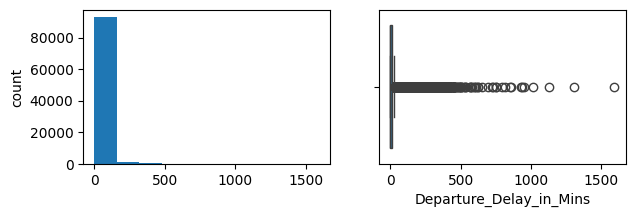

Arrival_Delay_in_Mins
Skew : 6.98


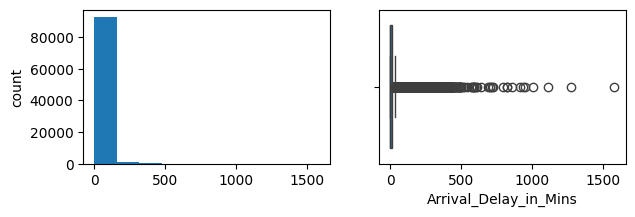

Overall_Experience
Skew : -0.19


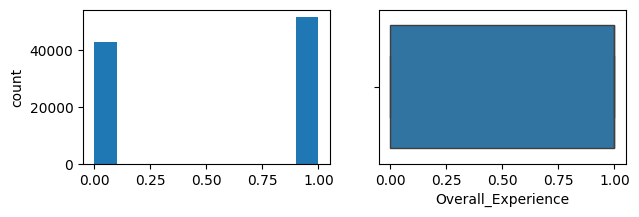

In [41]:
for col in num_cols:
    print(col)

    print('Skew :', round(train[col].skew(), 2))

    plt.figure(figsize = (7, 2))

    plt.subplot(1,2,1)

    train[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = train[col])

    plt.show()

ID is not important, I will drop that. The median age of survey participants riding the bullet train is 40, and age looks almsot normally distributed. There is large range in the travel distance records. Departure and Arrival delays also look like they may be skewed. Lets plot these to get a better idea:

It looks like Age is actually more or less normally distributed. The more normal the features are, the better the classification models will perform (and the less I will need to transform). Travel Distance is somewhat right skewed, and as I suspected departure and arrival delays are highly right skewed. These will need to be dealt will. There are several different approaches one could take to normalize data like this in classification problems. The approach I take later in this analysis is to use feature engineering to bin the values into categories.
Lets also take a look at the balance between negative and postiive overall experience:

In [42]:
train.Overall_Experience.value_counts(normalize = True)

Overall_Experience
1   0.54666
0   0.45334
Name: proportion, dtype: float64

There are marginally more positives than negatives, we can take balance into account when tuning the classifer models. Next, lets take a closer look at the categorical features:

In [43]:
cat_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding']

for col in cat_cols:
    print(train[col].value_counts(normalize = True))  # The parameter normalize = True gives the percentage of each category
    print('*'*40)

Gender
Female   0.50704
Male     0.49296
Name: proportion, dtype: float64
****************************************
Customer_Type
Loyal Customer      0.81733
Disloyal Customer   0.18267
Name: proportion, dtype: float64
****************************************
Type_Travel
Business Travel   0.68837
Personal Travel   0.31163
Name: proportion, dtype: float64
****************************************
Travel_Class
Eco        0.52281
Business   0.47719
Name: proportion, dtype: float64
****************************************
Seat_Comfort
Acceptable          0.22433
Needs Improvement   0.22208
Good                0.21836
Poor                0.16100
Excellent           0.13752
Extremely Poor      0.03672
Name: proportion, dtype: float64
****************************************
Seat_Class
Green Car   0.50260
Ordinary    0.49740
Name: proportion, dtype: float64
****************************************
Arrival_Time_Convenient
Good                0.22907
Excellent           0.20695
Acceptable        

most of the categorical features are ordinal. This is important to note as we will need to encode them in preprocessing before running the models. There are no missing categories but there is imbalance in the percentage of data in each catagory (some categories are not very well represented).
Finally, lets see if any of the features in the data are correlated:

In [44]:
plt.figure(figsize = (18, 10))

sns.heatmap(train.corr(), annot = True, fmt = ".2f")

plt.show()

ValueError: could not convert string to float: 'Female'

<Figure size 1800x1000 with 0 Axes>

Arrival and Departure delay are highly correlated (suprise suprise :), but there is little correlation between any of the other numeric variables.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

This is where Im going to drop the ID column out, and then split the data into the x (features) and y (target variable)

In [45]:
# Separating the target variable and other variables
x_train2 = train.drop(columns = 'Overall_Experience')
x_train2 = x_train2.drop(["ID"], axis = 1)
y_train2 = train['Overall_Experience']

Im going to impute the numeric features using an iterative imputer to replace missing values based on all other features for a record, and categorical features will be replaced with the most frequent value for each column. After imputing, in the same code chunk, I encode the categorical features. Since most of the categorical features are oridinal, and there are many levels, I use the label_encoder method rather than one-hot encoding. With decision trees and random forest, one hot encoding can increase the number of features so much that it introduces 'noise' and leads to multicoliniarity.

In [46]:
# create list of categorical and numeric features with missing data that needs to be imputed
impute_catcols = ['Gender','Customer_Type','Age','Type_Travel','Seat_Comfort','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment',
                  'Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']
impute_numcols = ['Departure_Delay_in_Mins','Arrival_Delay_in_Mins']

In [47]:
# instantiate the imputers
imputerA = IterativeImputer(random_state=0)
imputerB = SimpleImputer(strategy="most_frequent")

In [48]:
# impute the numeric columns, then Fit and transform the train data using the standard scalar
x_train2[impute_numcols] = pd.DataFrame(imputerA.fit_transform(x_train2[impute_numcols]), columns=x_train2[impute_numcols].columns)
scaler = StandardScaler()
x_train2[impute_numcols] = scaler.fit_transform(x_train2[impute_numcols])

#impute the categorical colums
x_train2[impute_catcols] = pd.DataFrame(imputerB.fit_transform(x_train2[impute_catcols]), columns=x_train2[impute_catcols].columns)
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in catagorocal columns
for x in cat_cols:
    x_train2[x] = label_encoder.fit_transform(x_train2[x])

Next, I bin the arrival and departure delay features to decrease the effect of skew and outliers

In [49]:
x_train2.loc[x_train2['Departure_Delay_in_Mins']<1,'Departure_Delay_in_Mins'] = 0
x_train2.loc[(x_train2['Departure_Delay_in_Mins']>=1)&(x_train2['Departure_Delay_in_Mins']<5),'Departure_Delay_in_Mins'] = 1
x_train2.loc[(x_train2['Departure_Delay_in_Mins']>=5)&(x_train2['Departure_Delay_in_Mins']<30),'Departure_Delay_in_Mins'] = 2
x_train2.loc[(x_train2['Departure_Delay_in_Mins']>=30)&(x_train2['Departure_Delay_in_Mins']<60),'Departure_Delay_in_Mins'] = 3
x_train2.loc[(x_train2['Departure_Delay_in_Mins']>60),'Departure_Delay_in_Mins'] = 4

x_train2.loc[x_train2['Arrival_Delay_in_Mins']<1,'Arrival_Delay_in_Mins'] = 0
x_train2.loc[(x_train2['Arrival_Delay_in_Mins']>=1)&(x_train2['Arrival_Delay_in_Mins']<5),'Arrival_Delay_in_Mins'] = 1
x_train2.loc[(x_train2['Arrival_Delay_in_Mins']>=5)&(x_train2['Arrival_Delay_in_Mins']<30),'Arrival_Delay_in_Mins'] = 2
x_train2.loc[(x_train2['Arrival_Delay_in_Mins']>=30)&(x_train2['Arrival_Delay_in_Mins']<60),'Arrival_Delay_in_Mins'] = 3
x_train2.loc[(x_train2['Arrival_Delay_in_Mins']>60),'Arrival_Delay_in_Mins'] = 4

and make sure all of the features are numeric

In [50]:
x_train2['Age'] = pd.to_numeric(x_train2['Age'])

### Random Forest

In [51]:
# Function to print classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [52]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "gini")

rf_estimator.fit(x_train2,y_train2)

RandomForestClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



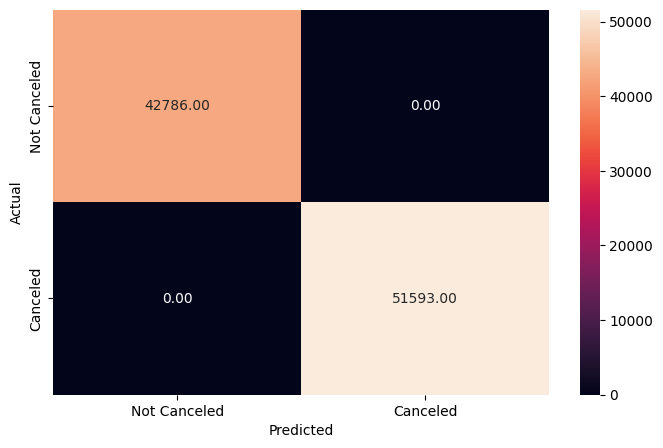

In [53]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(x_train2)

metrics_score(y_train2, y_pred_train3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



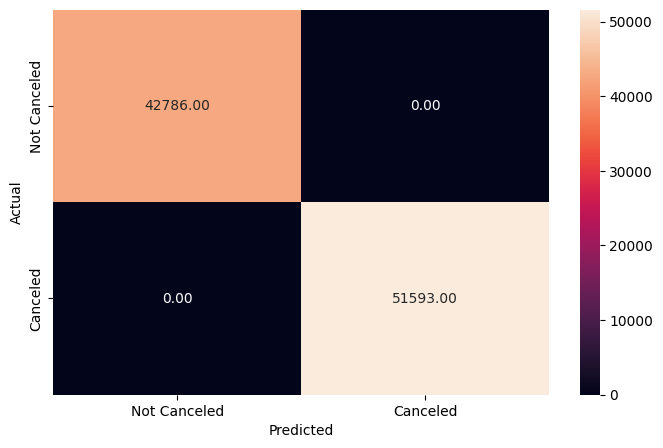

In [54]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(x_train2)

metrics_score(y_train2, y_pred_train3)

In [55]:
# Choose the type of classifier
rf_estimator_tuned2 = RandomForestClassifier(criterion = "gini", random_state = 7)

In [56]:
# Grid of parameters to choose from
parameters = {"n_estimators": [150, 250],
    "max_depth": [20,25],
    "max_features": [0.5, 0.7],
    "class_weight" : ["balanced",{0: 0.45, 1: 0.55}]
             }

In [57]:
# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

In [58]:
# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned2, parameters, scoring = scorer, cv = 5, n_jobs=-1)

In [59]:
grid_obj = grid_obj.fit(x_train2, y_train2)

In [61]:
# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [62]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(x_train2, y_train2)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=0.5,
                       n_estimators=150, random_state=7)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



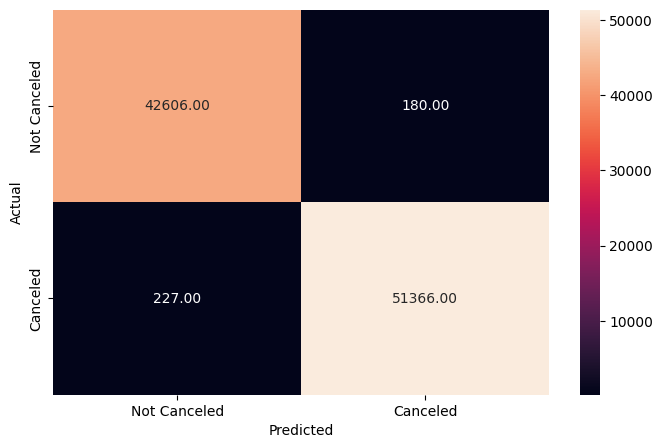

In [63]:
# Checking performance on the training data
y_pred_train = rf_estimator_tuned.predict(x_train2)

metrics_score(y_train2, y_pred_train)

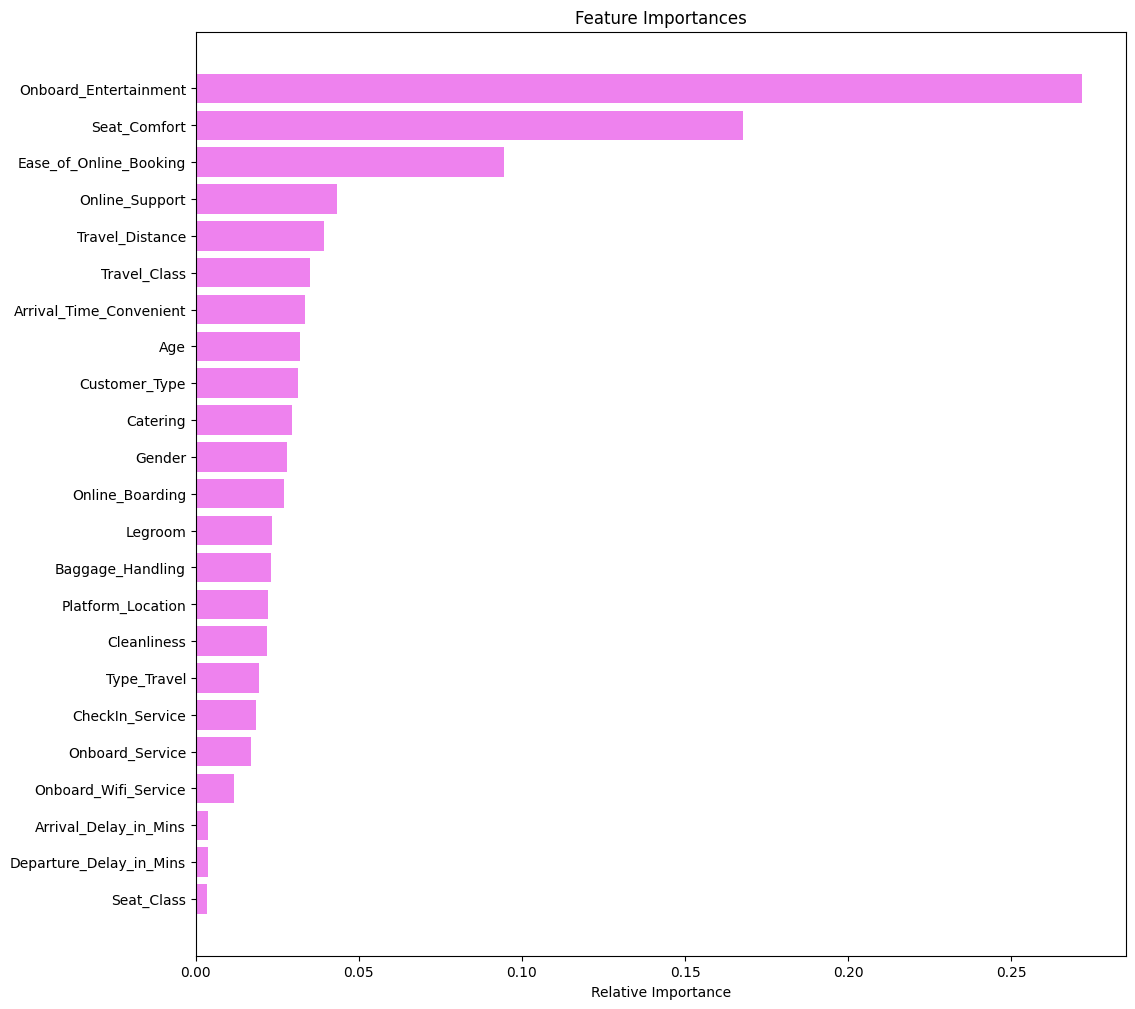

In [64]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(x_train2.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

In [65]:
# Separating the target variable and other variables
x_test2 = test.copy()
x_test2 = x_test2.drop(["ID"], axis = 1)
y_test2 = pd.DataFrame(test['ID'])

In [66]:
# Fit and transform the train data
x_test2[impute_numcols] = pd.DataFrame(imputerA.fit_transform(x_test2[impute_numcols]), columns=x_test2[impute_numcols].columns)
scaler = StandardScaler()
x_test2[impute_numcols] = scaler.fit_transform(x_test2[impute_numcols])

x_test2[impute_catcols] = pd.DataFrame(imputerB.fit_transform(x_test2[impute_catcols]), columns=x_test2[impute_catcols].columns)
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in catagorocal columns
for x in cat_cols:
    x_test2[x] = label_encoder.fit_transform(x_test2[x])

In [67]:
x_test2.loc[x_test2['Departure_Delay_in_Mins']<1,'Departure_Delay_in_Mins'] = 0
x_test2.loc[(x_test2['Departure_Delay_in_Mins']>=1)&(x_test2['Departure_Delay_in_Mins']<5),'Departure_Delay_in_Mins'] = 1
x_test2.loc[(x_test2['Departure_Delay_in_Mins']>=5)&(x_test2['Departure_Delay_in_Mins']<30),'Departure_Delay_in_Mins'] = 2
x_test2.loc[(x_test2['Departure_Delay_in_Mins']>=30)&(x_test2['Departure_Delay_in_Mins']<60),'Departure_Delay_in_Mins'] = 3
x_test2.loc[(x_test2['Departure_Delay_in_Mins']>60),'Departure_Delay_in_Mins'] = 4

x_test2.loc[x_test2['Arrival_Delay_in_Mins']<1,'Arrival_Delay_in_Mins'] = 0
x_test2.loc[(x_test2['Arrival_Delay_in_Mins']>=1)&(x_test2['Arrival_Delay_in_Mins']<5),'Arrival_Delay_in_Mins'] = 1
x_test2.loc[(x_test2['Arrival_Delay_in_Mins']>=5)&(x_test2['Arrival_Delay_in_Mins']<30),'Arrival_Delay_in_Mins'] = 2
x_test2.loc[(x_test2['Arrival_Delay_in_Mins']>=30)&(x_test2['Arrival_Delay_in_Mins']<60),'Arrival_Delay_in_Mins'] = 3
x_test2.loc[(x_test2['Arrival_Delay_in_Mins']>60),'Arrival_Delay_in_Mins'] = 4

In [68]:
x_test2['Age'] = pd.to_numeric(x_test2['Age'])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
#performing train-test split of (80:20) on the training data
X_train, X_test, Y_train, Y_test = train_test_split(x_train2, y_train2, test_size= 0.20, random_state=13)

display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(75503, 23)

(18876, 23)

(75503,)

(18876,)

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train2, y_pred_train)

In [72]:
accuracy

0.9956875999957617

In [73]:
# Instantiate the RandomForestClassifier with desired hyperparameters
#rf_estimator_tuned2 = RandomForestClassifier(criterion="gini", random_state=7)

In [74]:
# Fit the classifier to the training data
##rf_estimator_tuned2.fit(x_test2, y_test2)

In [75]:
y_pred_test2 = rf_estimator_tuned.predict(x_test2)

In [76]:
y_test2['Overall_Experience'] = y_pred_test2

In [77]:
y_test2.to_csv("MSP_HackathonSubmission_V01.csv",index=False)

### XGBoost

In [78]:
!pip install xgboost

In [79]:
import xgboost as xgb

In [80]:
# Import the XGBClassifier class from the xgboost library
from xgboost import XGBClassifier

In [81]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [84]:
#y_pred_test2 = rf_estimator_tuned.predict(x_test2)

In [87]:
y_pred_test2 = xgb.predict(x_test2)

In [88]:
y_test2['Overall_Experience'] = y_pred_test2

In [104]:
y_test2.to_csv("/content/drive/My Drive/MSP_HackathonSubmission_V02.csv",index=False)


In [91]:
accuracy = accuracy_score(y_train2, y_pred_train)

### XGBoost Regression

In [117]:
import xgboost as xgb
from xgboost import XGBRegressor

In [118]:
# Define the XGBoost regressor with the correct parameter names
xgb2 = xgb.XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5,
    colsample_bytree=0.8,
    subsample=0.8,
    learning_rate=0.1,  # eta is replaced with learning_rate
    random_state=42  # seed is replaced with random_state
)

# Assuming x_train2 and y_train2 are your training data
xgb2.fit(x_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [119]:
y_pred_test2 = xgb2.predict(x_test2)
y_test2['Overall_Experience'] = y_pred_test2
y_test2.loc[y_test2['Overall_Experience']<.5,'Overall_Experience'] = 0
y_test2.loc[y_test2['Overall_Experience']>.5,'Overall_Experience'] = 1
y_test2.to_csv("BenjaminCooper_HackathonSubmission_V06.csv",index=False)

In [120]:
y_test2.head()

,ID,Overall_Experience
0,99900001,1.00000
1,99900002,1.00000
2,99900003,1.00000
3,99900004,0.00000
4,99900005,1.00000


<Axes: >

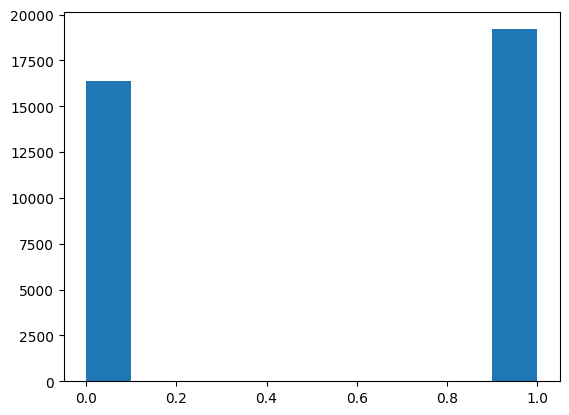

In [121]:
y_test2['Overall_Experience'].hist(bins = 10, grid = False)

### Tuning hyperparameters of XGBoost Regression


Some important hyperparameters that can be tuned:

 - **booster** [default = gbtree ] Which booster to use. Can be gbtree, gblinear, or dart; gbtree and dart use tree-based models while gblinear uses linear functions.

 - **min_child_weight** [default = 1]

   The minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.The larger min_child_weight is, the more conservative the algorithm will be.

  For a better understanding of each parameter in the XGBoost Classifier, please refer to this [source](https://xgboost.readthedocs.io/en/stable/parameter.html).

In [122]:
params = { 'max_depth': [3,10,20],
           'learning_rate': [0.01,0.1,0.3],
           'subsample': np.arange(0.5,1.0,0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
grid_obj = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [123]:
grid_obj = grid_obj.fit(x_train2, y_train2)

# Set the classifier to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [124]:
xgb_tuned

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7999999999999999, colsample_bynode=None,
             colsample_bytree=0.7999999999999999, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [125]:
y_test3 = pd.DataFrame(test['ID'])
y_pred_test3 = xgb_tuned.predict(x_test2)

In [126]:
y_test3['Overall_Experience'] = y_pred_test3

<Axes: >

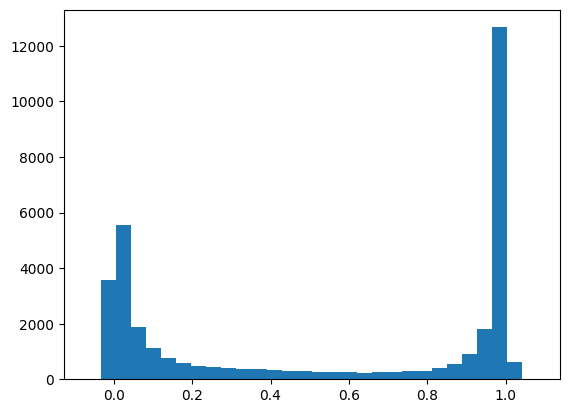

In [127]:
y_test3['Overall_Experience'].hist(bins = 30, grid = False)

In [128]:
y_test3.loc[y_test3['Overall_Experience']<.5,'Overall_Experience'] = 0
y_test3.loc[y_test3['Overall_Experience']>.5,'Overall_Experience'] = 1

<Axes: >

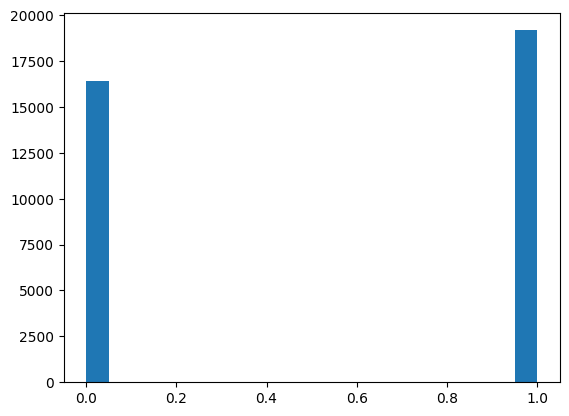

In [129]:
y_test3['Overall_Experience'].hist(bins = 20, grid = False)

In [130]:
y_test3.to_csv("/content/drive/My Drive/MSP_HackathonSubmission_V03.csv",index=False)